<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/hospital_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07.12<BR>
hospital EDA

# 1. 패키지 및 데이터 로드

In [1]:
system("gdown --id 1fW-c6QeKD39JKGJYc_M9JI0wiNBkbQFC")

In [83]:
df= read.csv("hospital.csv")

In [3]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
#as.data.frame(installed.packages()) %>%
#  filter(grepl("Data", Package) )

In [5]:
require(magrittr)
require(lubridate)
require(ggplot2)

Loading required package: magrittr

Loading required package: lubridate

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggplot2



In [6]:
as.data.frame(installed.packages()) %>%
  filter(grepl("lubri", Package))

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
lubridate,lubridate,/usr/lib/R/site-library,1.8.0,NA,"methods, R (>= 3.2)",generics,cpp11 (>= 0.2.7),"covr, knitr, testthat (>= 2.1.0), vctrs (>= 0.3.0), rmarkdown","chron, timeDate, tis, zoo",GPL (>= 2),NA,NA,NA,NA,yes,4.1.1


In [7]:
install.packages(c("DataExplorer","skimr","ggridges","pacman"))
pacman::p_load("DataExplorer","skimr","ggridges")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’, ‘plyr’




In [8]:
str(df)

'data.frame':	49674 obs. of  4 variables:
 $ back_hospital.yyyymmdd : int  20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 ...
 $ back_hospital.area     : chr  "강원" "강원" "경기" "경기" ...
 $ back_hospital.sex      : int  1 2 1 2 1 2 1 2 1 2 ...
 $ back_hospital.frequency: int  3 3 4 5 2 1 6 1 0 2 ...


In [9]:
glimpse(df)

Rows: 49,674
Columns: 4
$ back_hospital.yyyymmdd  <int> 20120101, 20120101, 20120101, 20120101, 201201…
$ back_hospital.area      <chr> "강원", "강원", "경기", "경기", "경남", "경남"…
$ back_hospital.sex       <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2…
$ back_hospital.frequency <int> 3, 3, 4, 5, 2, 1, 6, 1, 0, 2, 1, 0, 4, 1, 3, 6…


In [10]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             49674 
Number of columns          4     
_______________________          
Column type frequency:           
  character                1     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 back_hospital.area         0             1   2   2     0       17          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate        mean        sd       p0
1 back_hospital.yyyymmdd          0             1 20135658.   11189.    20120101
2 back_hospital.sex               0             1        1.5      0.500        1
3 back_hospital.frequency         0             1     

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [11]:
duplicated(df) %>% sum # 중복없음

[1] 0

1. 4개의 변수는 총 49674(약5만개)의 관측치를 가지고 있음
2. 그 중 타겟(`frequency`)를 제외한 3개 변수는 모두 범주형임.
3. `yyyymmdd` 날짜,`area` 지역(도단위), `sex` 성별
4. `sex`의 mean과 Median을 봤을때 매우 밸런스함
5. 타겟은 min=0, max=13, mean=1.42, Median=1.5 -> 회귀 모델시 로그변환 필요
6. 중복 없음 

### 검증 데이터셋에 맞춰 변수명 변경

In [84]:
require(stringr)

In [85]:
"back_hospital." %>% nchar ->nchar

In [86]:
names(df)= str_sub(names(df),nchar+1)

In [87]:
df %>% head # 확인

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<int>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


In [88]:
write.csv(df, "hospital_rename.csv", row.names=FALSE) 

# 1. BASIC EDA

In [ ]:
introduce(df) %>% str

'data.frame':	1 obs. of  9 variables:
 $ rows                : int 49674
 $ columns             : int 4
 $ discrete_columns    : int 1
 $ continuous_columns  : int 3
 $ all_missing_columns : int 0
 $ total_missing_values: int 0
 $ complete_rows       : int 49674
 $ total_observations  : int 198696
 $ memory_usage        : num 996168
 - attr(*, ".internal.selfref")=<externalptr> 


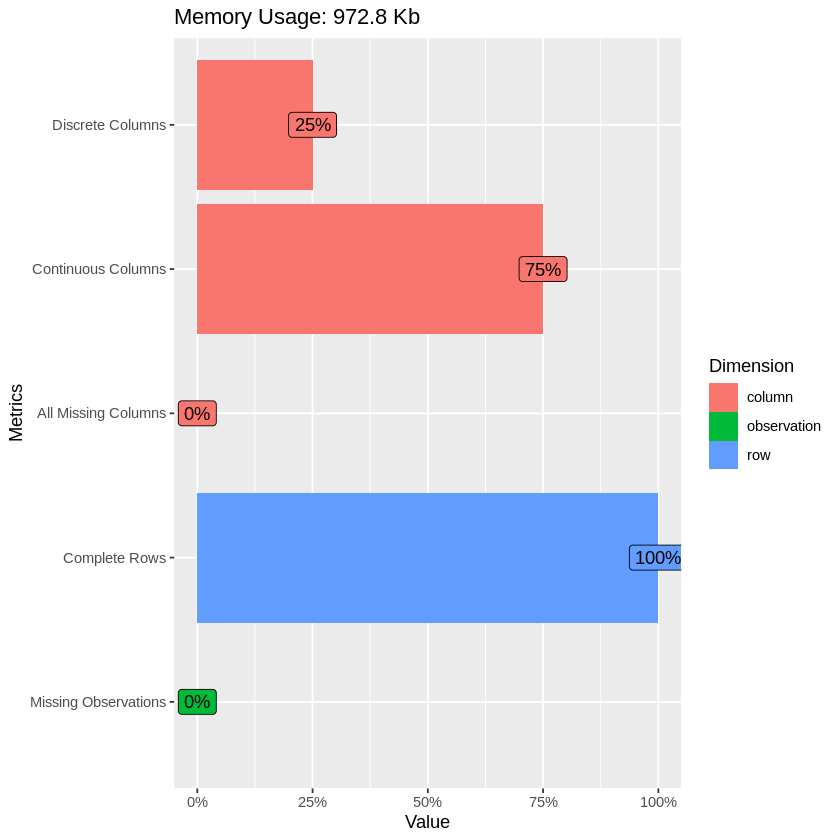

In [ ]:
plot_intro(df) # 미씽 없음 

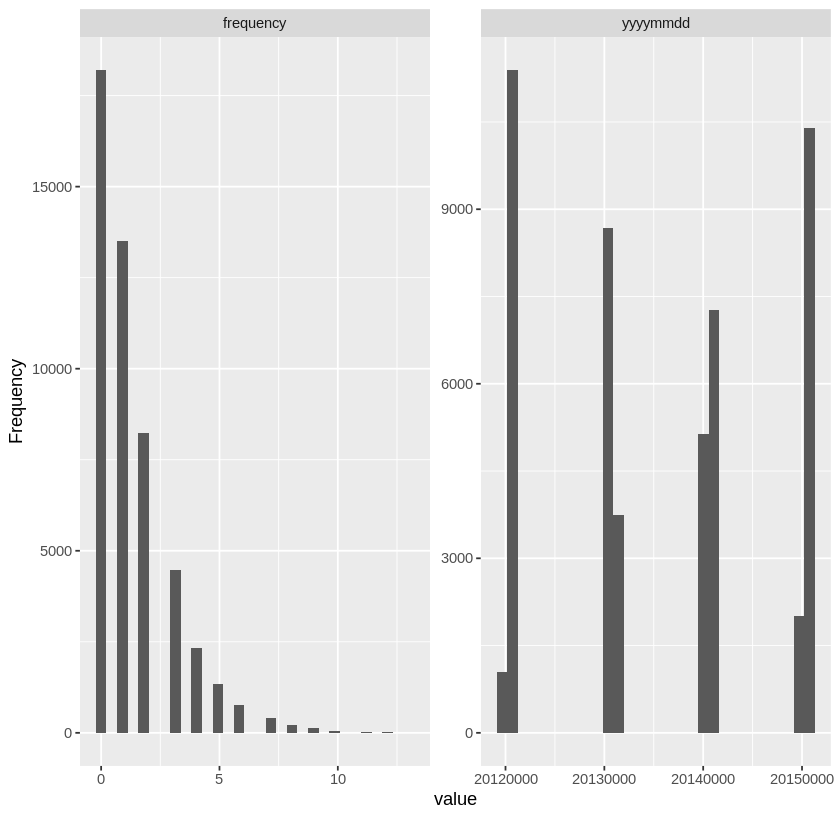

In [ ]:
plot_histogram(df)

앞서 확인한 것과 마찬가지로 0의 빈도가 가장 많음

In [ ]:
#df%>% mutate(frequency=as.factor(frequency)) -> df_target_factor
#df%>% mutate(frequency=as.character(frequency)) -> df_target_char

In [ ]:
#head(df_target_factor)

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<fct>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


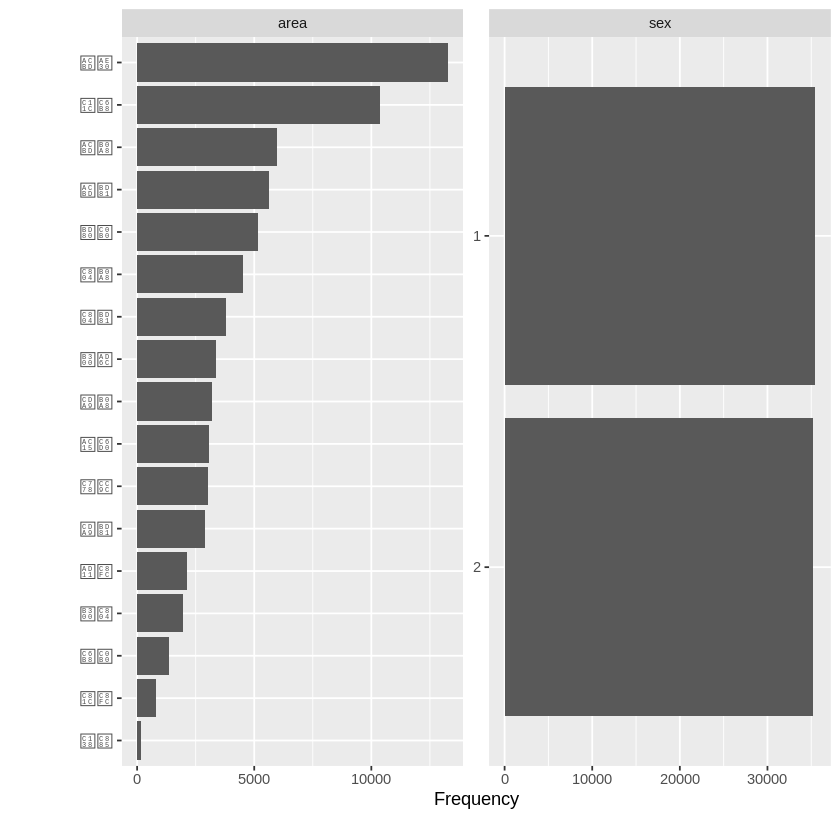

In [ ]:
plot_bar(df, with='frequency')

In [ ]:
table(df$ sex)
table(df$ area)


    1     2 
24837 24837 


강원 경기 경남 경북 광주 대구 대전 부산 서울 세종 울산 인천 전남 전북 제주 충남 
2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 
충북 
2922 

In [ ]:
table(df$frequency)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
18197 13513  8231  4467  2321  1347   756   395   222   132    58    20    10 
   13 
    5 

In [ ]:
df %>% filter(frequency !=0) %>% nrow() 
df %>% filter(frequency ==0) %>% nrow()

[1] 31477

[1] 18197

발생함-> 31477건<br>
발생하지않음->18197건


In [ ]:
df %>% filter(frequency !=0) %>% nrow() / nrow(df) * 100 -> ok
df %>% filter(frequency ==0) %>% nrow()/ nrow(df) * 100 -> no
paste0("발생 비율은 ", round(ok,2), "%"," ","입니다.")
paste0("발생 하지 않은 비율은 ", round(no,2), "%"," ","입니다.")

[1] "발생 비율은 63.37% 입니다."

[1] "발생 하지 않은 비율은 36.63% 입니다."

# 파생변수 - 발생(1) 발생하지 않음(0)

In [89]:
df %<>% mutate(event=case_when(frequency == 0 ~ 0 ,
                              TRUE~ 1)
              ) 

In [90]:
df %>% filter(event !=0) %>% nrow()
df %>% filter(event ==0) %>% nrow()

[1] 31477

[1] 18197

In [91]:
df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

area,sum_freq
<chr>,<int>
경기,13267
서울,10354
경남,5979
경북,5614
부산,5146
전남,4532
전북,3808
대구,3363
충남,3194


비율을 알아야함. 이거만 봐선 모르겠음

성별은 상관 없어 보임

# 지역별 성별의 차이

In [ ]:
df %>% group_by(area) %>% 
       mutate(area_freq= sum(frequency)) -> df_area

In [ ]:
df %>% group_by(area, sex) %>% 
       mutate(area_sex_freq= sum(frequency))  -> df_area_sex

In [126]:
require(data.table)

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100)  %>% head

Joining, by = c("yyyymmdd", "area", "sex", "frequency", "event")


yyyymmdd,area,sex,frequency,event,area_freq,area_sex_freq,prop
<int>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
20120101,강원,1,3,1,3069,1637,53.33985
20120101,강원,2,3,1,3069,1432,46.66015
20120101,경기,1,4,1,13267,6760,50.95349
20120101,경기,2,5,1,13267,6507,49.04651
20120101,경남,1,2,1,5979,2906,48.60345
20120101,경남,2,1,1,5979,3073,51.39655


In [ ]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100) %>% 
  ungroup %>%
  as.data.table() ->DT

Joining, by = c("yyyymmdd", "area", "sex", "frequency", "event")


In [ ]:
#DT[ , diff  :=abs( prop - shift(prop) ) , by = area]

In [ ]:
#DT %>% head # 확인
DT[ , .(diff=abs( prop - shift(prop) )%>%round(3) ), by = area] %>% 
  arrange(-diff)%>%
  distinct() %>%
  na.omit()

area,diff
<chr>,<dbl>
세종,14.110
전북,10.242
광주,10.169
전남,7.679
부산,7.268
강원,6.680
대전,3.860
제주,3.648
인천,3.292


1. 주어진 기간 내, 지역별로 성별 별 차이가 많은 지역 top3. 세종(14.11), 전북(10.242), 광주(10.169)  
  - 비교적 연도 별 feq이 적은 편인 지역임,  세종-전북-광주 경도로 내려기는게 이어지는 위치임. 
  - Q. 세종을 감싸는 충북 충남 대전은 왜?? 
  - 기후 파악이 필수적 
2. 주어진 기간 내, 지역별로 성별 별 차이가 없는 지역 top3. 울산(0.29), 대구(1.1), 경북(1.14)
  - 역시 경도상 이어짐
3. 결론
- 처음부터 성비가 다른가?
- raw data의 sampling된 성비 비율은 같았음.
- 지역별 특성에는 성별도 포함될 수 있다고 생각함. 성별 데이터 추가로 포함
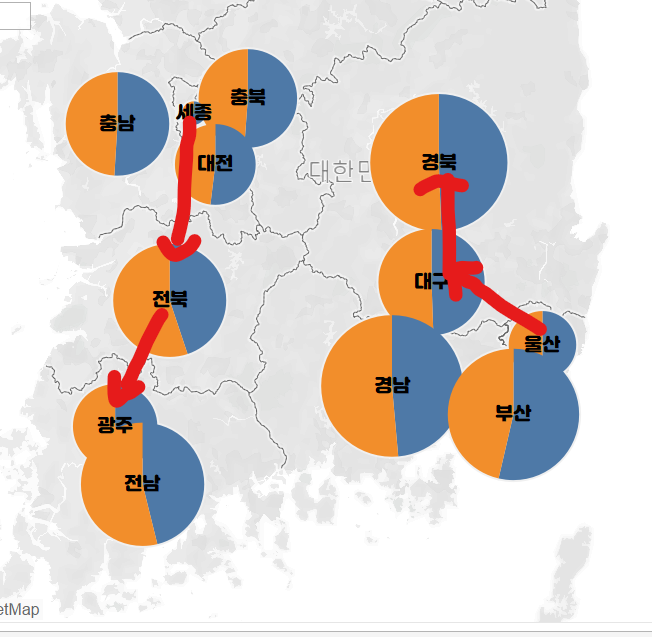



이상 태블로로 확인함

In [ ]:
시간에 따라서 빈도 어떻게 발생하는지
지역에 따라서 빈도 어떻게 발생하는지


ERROR: ignored

# 파생변수 - 날짜 파싱

In [92]:
ymd(df$yyyymmdd) %>% head   #int라서 안먹힘 

[1] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
[6] "2012-01-01"

In [93]:
#df %>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd")) %>%
#  head()
df %<>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd"))

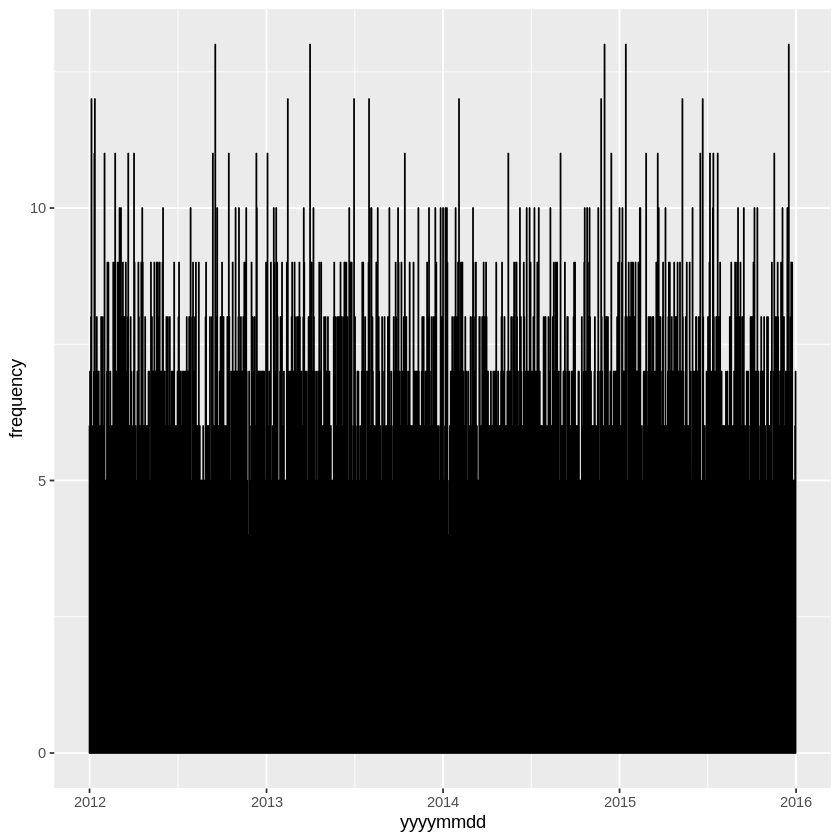

In [22]:
ggplot(df, aes(x = yyyymmdd, y = frequency)) +
  geom_line()

무슨 요일에 많이 발생했는지 궁금 

In [23]:
#require(lubridate) #wday
#?lubridate::wday
#?data.table::wday

In [94]:
df %>% mutate( year=year(yyyymmdd),
               month=month(yyyymmdd),
               day=day(yyyymmdd),
               yday=yday(yyyymmdd),
               wday=lubridate::wday(yyyymmdd, label=TRUE) ) ->df_date

In [95]:
df_date %>% head # 확인 

,yyyymmdd,area,sex,frequency,event,year,month,day,yday,wday
,<dttm>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<ord>
1,2012-01-01,강원,1,3,1,2012,1,1,1,Sun
2,2012-01-01,강원,2,3,1,2012,1,1,1,Sun
3,2012-01-01,경기,1,4,1,2012,1,1,1,Sun
4,2012-01-01,경기,2,5,1,2012,1,1,1,Sun
5,2012-01-01,경남,1,2,1,2012,1,1,1,Sun
6,2012-01-01,경남,2,1,1,2012,1,1,1,Sun


In [26]:
df_date$ year %>% table
df_date$ month %>% table
df_date$ day %>% table

.
 2012  2013  2014  2015 
12444 12410 12410 12410 

.
   1    2    3    4    5    6    7    8    9   10   11   12 
4216 3842 4216 4080 4216 4080 4216 4216 4080 4216 4080 4216 

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1632 1530 1496  952 

In [27]:
wday(df$yyyymmdd) %>% table

.
   1    2    3    4    5    6    7 
7106 7106 7106 7106 7106 7072 7072 

In [28]:
xtabs(frequency~wday, df_date) %>% prop.table()*100

wday
     Sun      Mon      Tue      Wed      Thu      Fri      Sat 
11.30299 17.50018 15.60762 15.40236 14.63939 13.91181 11.63564 

In [29]:
xtabs(frequency~wday+area, data=df_date) %>% prop.table()*100 

     area
wday        강원       경기       경남       경북       광주       대구
  Sun 0.51525232 2.18840682 0.93566424 0.87196546 0.33689575 0.52940760
  Mon 0.74881450 3.22457357 1.62361101 1.37306250 0.53223866 0.86347229
  Tue 0.68086913 2.86078279 1.25415811 1.24141836 0.48552622 0.69077783
  Wed 0.67096044 2.94996107 1.30653266 1.26689787 0.44447590 0.66954491
  Thu 0.64264987 2.73621629 1.20744568 1.17913511 0.42890509 0.68653125
  Fri 0.60159955 2.62722061 1.14091585 1.06872390 0.40201005 0.70351759
  Sat 0.48411069 2.19265341 0.99511643 0.94557294 0.37653054 0.61717036
     area
wday        대전       부산       서울       세종       울산       인천
  Sun 0.34963550 0.68370019 1.71278930 0.02264845 0.19817397 0.51949890
  Mon 0.47986411 1.30653266 2.54228891 0.04812796 0.32415599 0.72475051
  Tue 0.42324298 1.18621275 2.35685470 0.04105032 0.30433859 0.63274117
  Wed 0.40484111 1.12676056 2.23936584 0.02123293 0.31283176 0.65397410
  Thu 0.39493241 1.07155496 2.18416024 0.03114162 0.27178144 0.63415

1. 모든 지역에서 월요일이 가장 높음 
하지만 이건 일요일에 병원 문닫는 데도 있어서 그럴 수도 

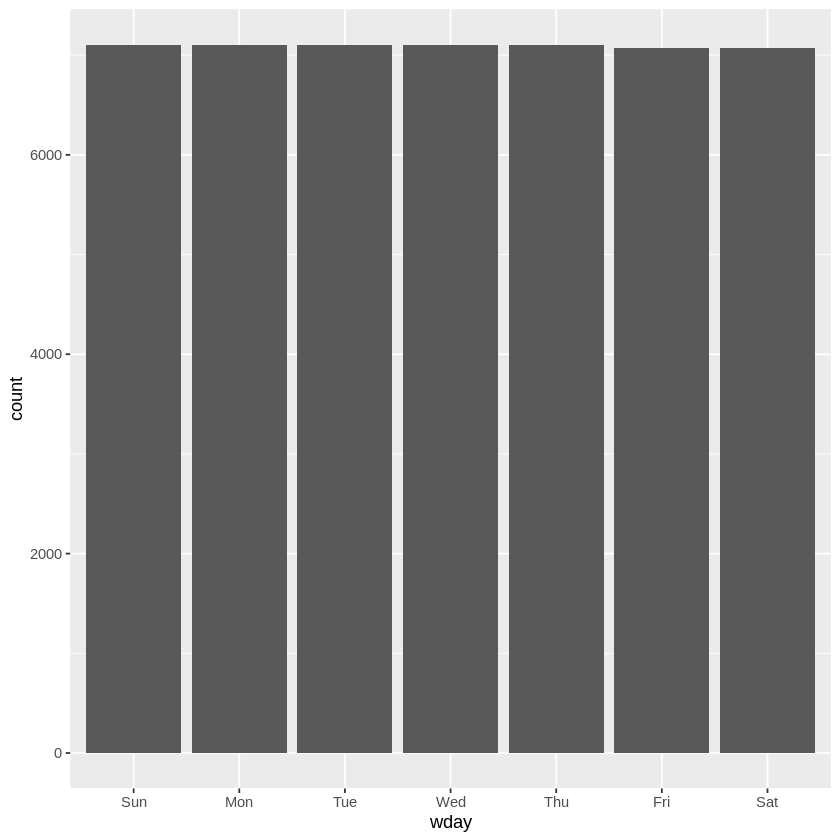

In [30]:
ggplot(df_date, aes(wday)) +
  geom_bar()

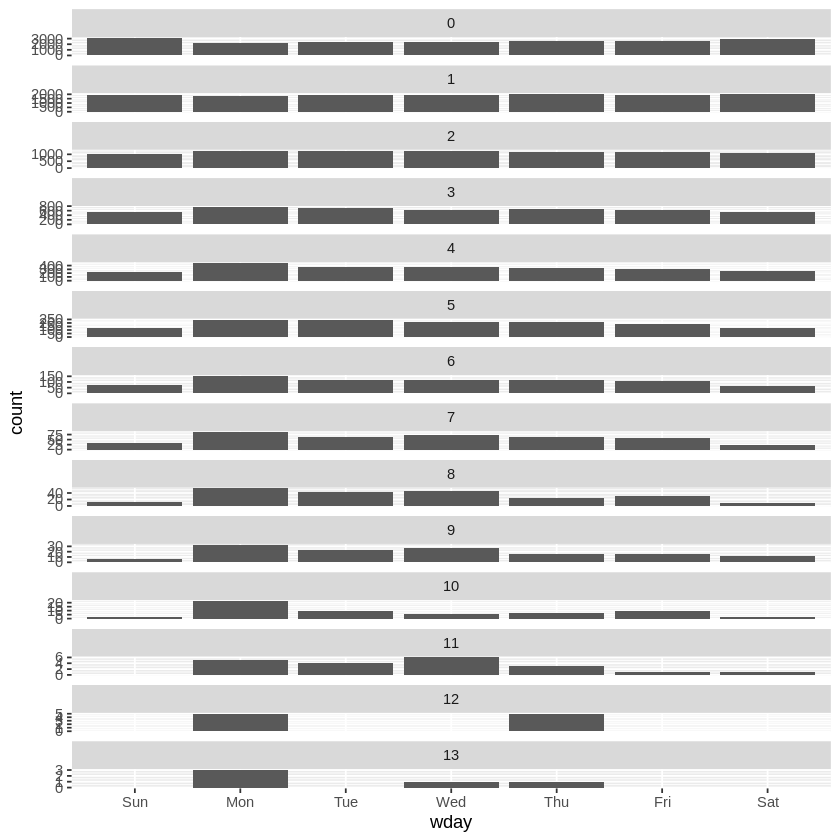

In [31]:
ggplot(df_date, aes(wday)) +
  geom_bar() +
  facet_wrap(~ frequency, ncol = 1, scale = "free_y")

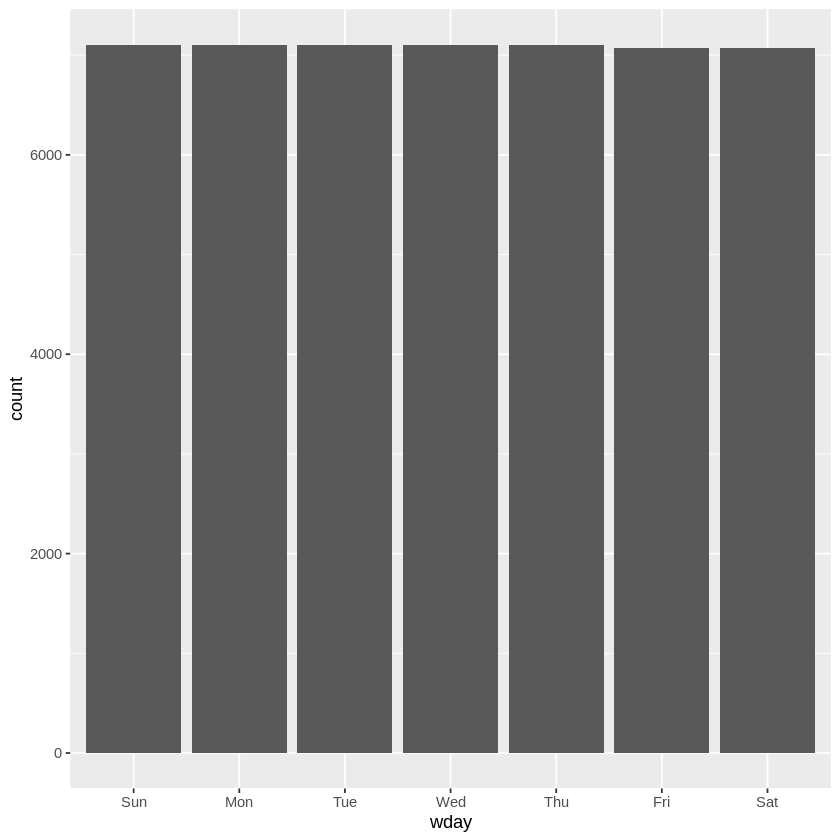

In [32]:
ggplot(df_date, aes(wday)) +
  geom_bar() 

## month 기준

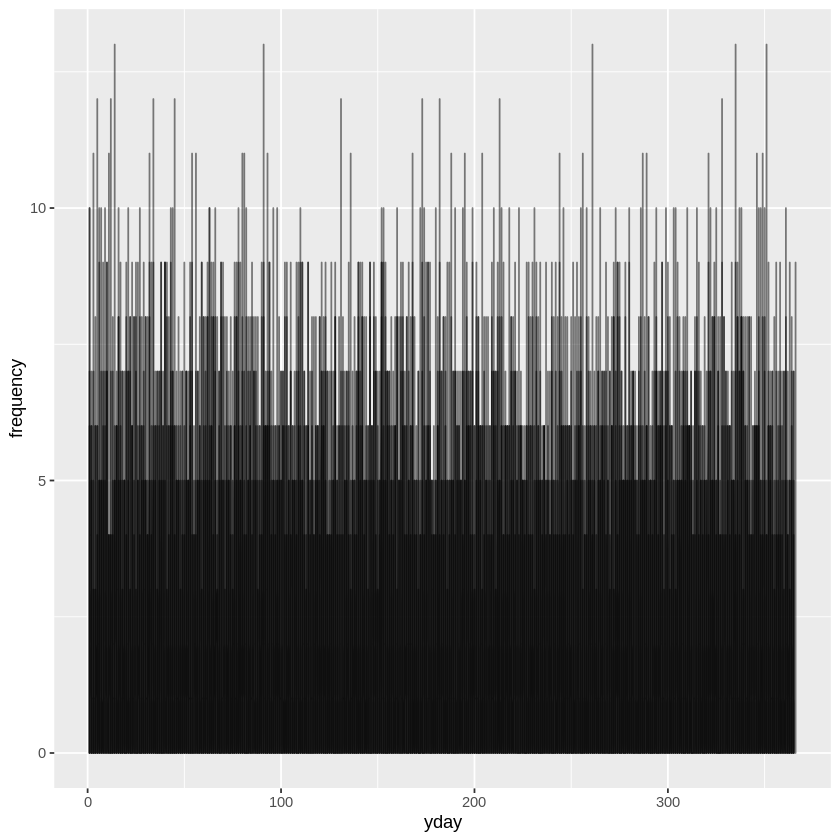

In [33]:
ggplot(df_date, aes(x = yday, y = frequency)) +
  geom_line(aes(group = year), alpha = 0.5)

  ### 이거 에스키스로 해보기 ####

## df_date_month 저장

In [34]:
df_date %>% mutate(month=month(yyyymmdd, label=TRUE)) -> df_date_month

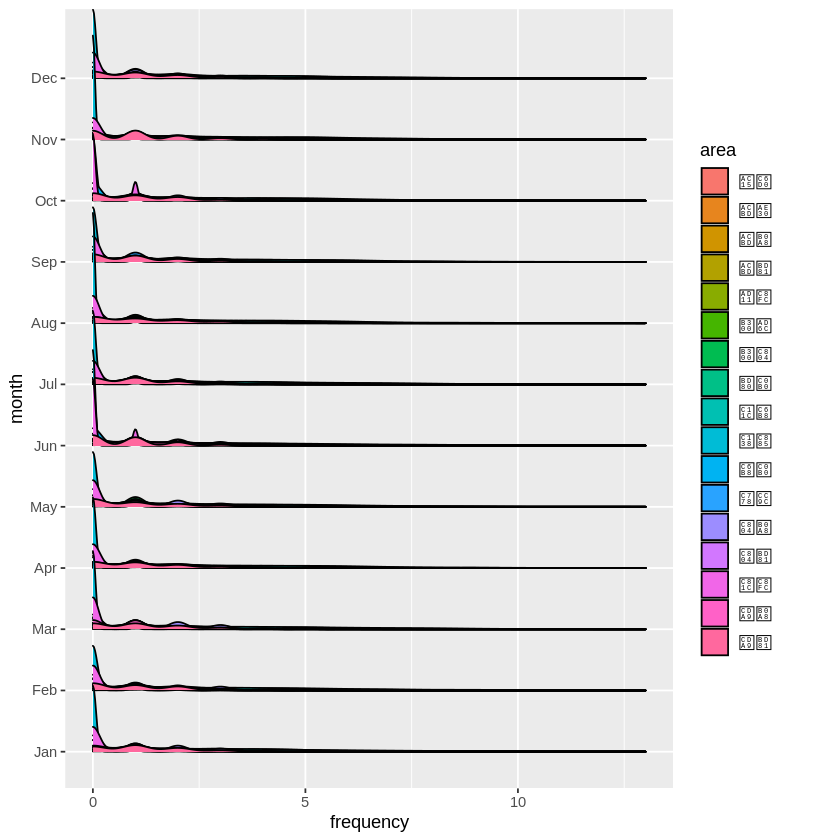

In [35]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density.., fill=area)) +
  geom_density_ridges(stat = "density")

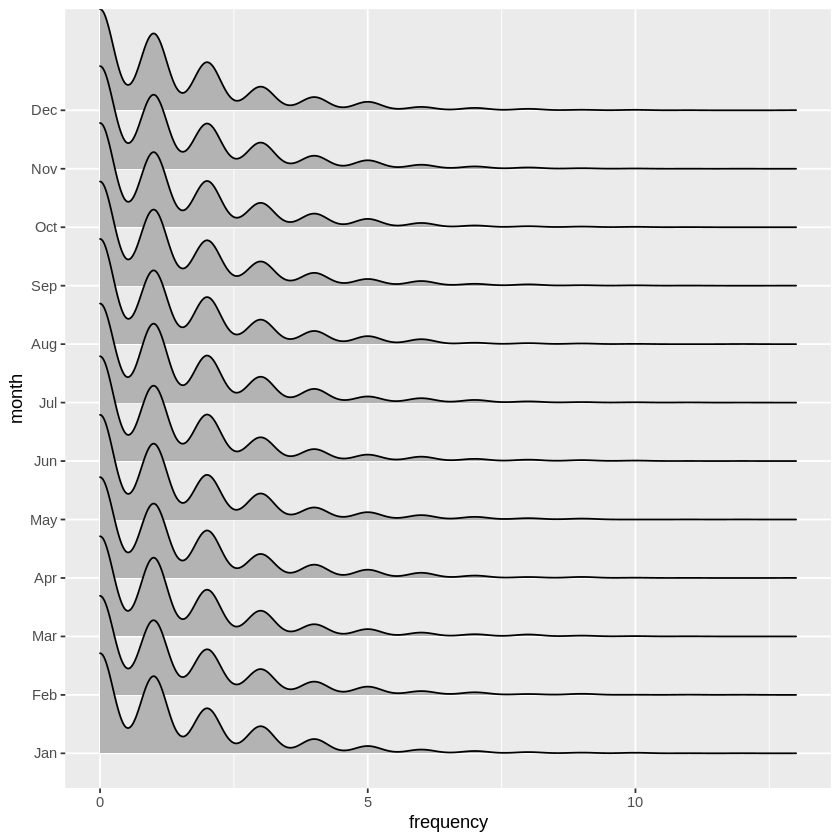

In [36]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

간단한 시계열 그래프로 확인 해봐야 할 것 같음 . 

In [37]:
xtabs(frequency~year, df_date)

year
 2012  2013  2014  2015 
17373 17479 17623 18170 

In [38]:
with(df_date_month,   table(frequency, month) )

         month
frequency  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
       0  1508 1381 1509 1479 1577 1537 1492 1585 1529 1570 1506 1524
       1  1161 1042 1185 1091 1142 1105 1188 1110 1116 1130 1086 1157
       2   678  636  703  696  672  682  708  708  665  696  663  724
       3   408  360  387  352  392  348  389  369  355  367  384  356
       4   215  185  183  195  181  175  206  198  188  205  191  199
       5   110  115  110  121  110   94   92  120   98  125  124  128
       6    57   53   58   76   66   64   66   74   68   64   59   51
       7    35   36   33   35   40   32   40   21   27   26   34   36
       8    19   12   29   14   20   20   18   15   19   15   19   22
       9    11   15   12   15   14   14    8   10    7   10    8    8
       10    9    2    5    4    0    7    5    4    5    6    4    7
       11    2    3    2    1    1    1    3    0    2    2    1    2
       12    2    2    0    0    1    1    1    2    0    0    1    0
     

In [39]:
xtabs(frequency~month, df_date_month)

month
 Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
6138 5587 6025 5936 5921 5670 6042 5890 5650 5926 5827 6033 

In [111]:
#월별 freq
df_date_month %>% group_by(month) %>% 
  summarise(sum_freq=sum(frequency)) %>%
  arrange(-sum_freq)

month,sum_freq
<ord>,<int>
Jan,6138
Jul,6042
Dec,6033
Mar,6025
Apr,5936
Oct,5926
May,5921
Aug,5890
Nov,5827


In [113]:
#월>일 별 freq
df_date_month %>% group_by(month,day) %>% 
  summarise(sum_freq=sum(frequency)) %>%
  arrange(-sum_freq)
#8월 제외하고 1일에 발생 빈도가 가장 높음 

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,day,sum_freq
<ord>,<int>,<int>
Apr,1,354
Dec,1,354
Jan,1,350
Feb,1,347
Jun,1,343
Jul,1,339
May,1,334
Oct,1,327
Aug,1,305


In [125]:
df_date_month %>% filter(year==2012, month=="Apr", area=="강원") %>% count(sex,wt=event)
df_date_month %>% filter(year==2012, month=="Apr", area=="강원") %>% nrow()
#df_date_month %>% filter(year==2012, month=="Apr", area=="강원") 

sex,n
<int>,<dbl>
1,20
2,18


[1] 60

yyyymmdd,area,sex,frequency,event,year,month,day,yday,wday
<dttm>,<chr>,<int>,<int>,<dbl>,<dbl>,<ord>,<int>,<dbl>,<ord>
2012-04-01,강원,1,2,1,2012,Apr,1,92,Sun
2012-04-01,강원,2,3,1,2012,Apr,1,92,Sun
2012-04-02,강원,1,3,1,2012,Apr,2,93,Mon
2012-04-02,강원,2,1,1,2012,Apr,2,93,Mon
2012-04-03,강원,1,0,0,2012,Apr,3,94,Tue
2012-04-03,강원,2,0,0,2012,Apr,3,94,Tue
2012-04-04,강원,1,1,1,2012,Apr,4,95,Wed
2012-04-04,강원,2,1,1,2012,Apr,4,95,Wed
2012-04-05,강원,1,0,0,2012,Apr,5,96,Thu


In [115]:
df_date_month %>% group_by(month,day) %>% 
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,day,sum_event
<ord>,<int>,<dbl>
Apr,1,114
Jan,1,111
Feb,1,111
Sep,1,111
Nov,1,111
May,1,110
Jun,1,109
Jul,1,108
Dec,1,107


1. `year` 2015년에 가장 많이 발생(18170) > 2014> 2013> 2012 
2. `month` 1월>7월> 12월 ,, 근데 2월 9월 6월 제일 작음 



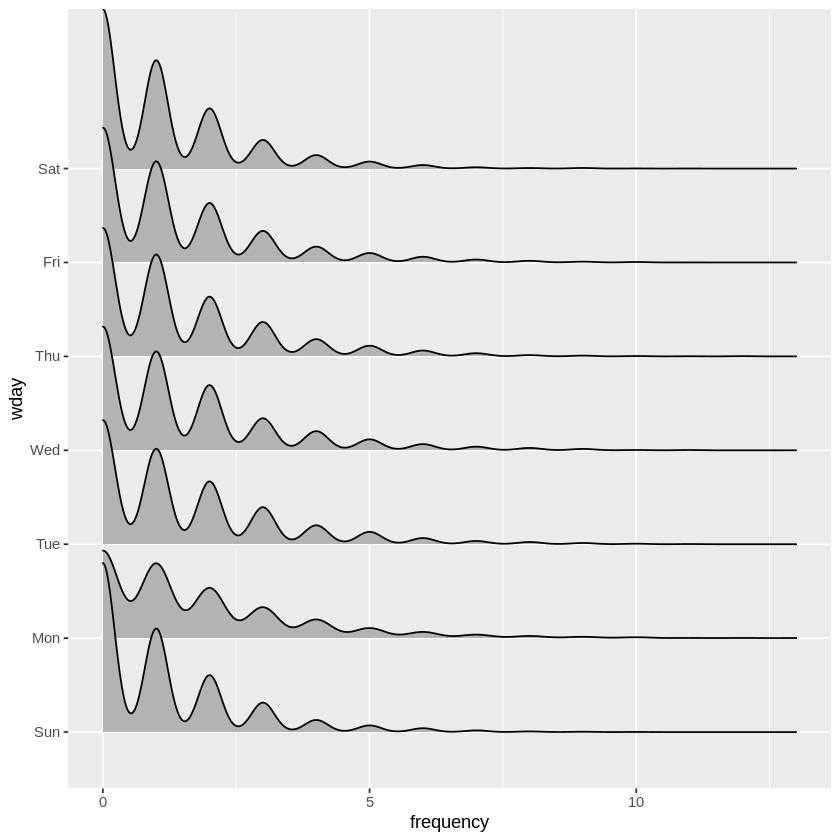

In [40]:
ggplot(df_date_month, aes(x = frequency, y = wday, height = ..density..)) +
  geom_density_ridges(stat = "density")

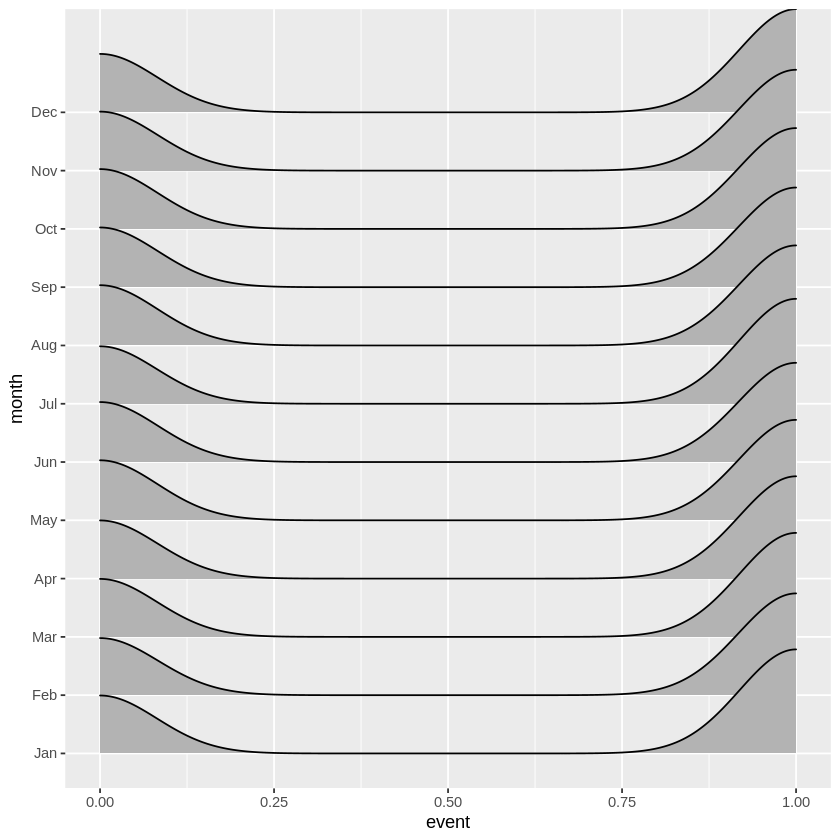

In [41]:
ggplot(df_date_month, aes(x = event, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [42]:
with(df_date_month,   table(event, month) )

     month
event  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
    0 1508 1381 1509 1479 1577 1537 1492 1585 1529 1570 1506 1524
    1 2708 2461 2707 2601 2639 2543 2724 2631 2551 2646 2574 2692

###- df_date_month 저장

In [43]:
write.csv(df_date_month, "df_date_month.csv", row.names=FALSE)

In [96]:
#발생 했는지 안했는지 
df_date_month %>% group_by(area) %>%
  summarise(days_event= sum(event)) %>%
  arrange(-days_event)

# 발생 빈도 sum 
  df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

area,days_event
<chr>,<dbl>
경기,2883
서울,2817
경남,2472
경북,2433
부산,2354
전남,2234
전북,2097
대구,1971
충남,1910


area,sum_freq
<chr>,<int>
경기,13267
서울,10354
경남,5979
경북,5614
부산,5146
전남,4532
전북,3808
대구,3363
충남,3194


강원,인천(빈도수 1차이) 말고 순서 같음

- _df_any_event_

In [ ]:
#df_date_month %>% group_by(month, yyyymmdd) %>%
#  summarise(any_event= any(event)) ->df_any_event

In [97]:
#df_any_event %>%  head()

month,yyyymmdd,any_event
<ord>,<dttm>,<lgl>
Jan,2012-01-01,TRUE
Jan,2012-01-02,TRUE
Jan,2012-01-03,TRUE
Jan,2012-01-04,TRUE
Jan,2012-01-05,TRUE
Jan,2012-01-06,TRUE


In [100]:
df_date_month %>% group_by(month) %>%
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event)

month,sum_event
<ord>,<dbl>
Jul,2724
Jan,2708
Mar,2707
Dec,2692
Oct,2646
May,2639
Aug,2631
Apr,2601
Nov,2574


In [108]:
?count

In [107]:
df_date_month %>% group_by(year) %>%
  count(month,  wt=event )

year,month,n
<dbl>,<ord>,<dbl>
2012,Jan,660
2012,Feb,626
2012,Mar,676
2012,Apr,629
2012,May,652
2012,Jun,610
2012,Jul,659
2012,Aug,624
2012,Sep,631


In [105]:
df_date_month %>% group_by(year,month) %>%
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,sum_event
<dbl>,<ord>,<dbl>
2013,Jan,694
2014,Jul,691
2015,Jul,691
2015,Oct,690
2015,May,689
2015,Jan,686
2015,Mar,686
2013,Jul,683
2014,Mar,679


In [49]:
df_any_event %>% 
  summarise(
    days_event = sum(any_event),
  ) %>%
  arrange(-days_event)

month,days_event
<ord>,<int>
Jan,124
Mar,124
May,124
Jul,124
Aug,124
Oct,124
Dec,124
Apr,120
Jun,120


In [82]:
df_date_month %>% head()

,yyyymmdd,area,sex,frequency,event,year,month,day,yday,wday
,<dttm>,<chr>,<int>,<int>,<dbl>,<dbl>,<ord>,<int>,<dbl>,<ord>
1,2012-01-01,강원,1,3,1,2012,Jan,1,1,Sun
2,2012-01-01,강원,2,3,1,2012,Jan,1,1,Sun
3,2012-01-01,경기,1,4,1,2012,Jan,1,1,Sun
4,2012-01-01,경기,2,5,1,2012,Jan,1,1,Sun
5,2012-01-01,경남,1,2,1,2012,Jan,1,1,Sun
6,2012-01-01,경남,2,1,1,2012,Jan,1,1,Sun


In [72]:
df_date_month %>% group_by(year, month) %>%
  summarise(any_event = sum(event)) %>%
  arrange(-any_event)  %>% head(10)

df_date_month %>% group_by(year, month) %>%
  summarise(any_event = sum(event)) %>%
  arrange(any_event)  %>% head(10)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,any_event
<dbl>,<ord>,<dbl>
2013,Jan,694
2014,Jul,691
2015,Jul,691
2015,Oct,690
2015,May,689
2015,Jan,686
2015,Mar,686
2013,Jul,683
2014,Mar,679


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,any_event
<dbl>,<ord>,<dbl>
2014,Feb,601
2012,Jun,610
2013,Feb,613
2015,Feb,621
2012,Aug,624
2012,Feb,626
2012,Apr,629
2013,Nov,629
2013,Sep,630


- `가장 많이 발생` (2015년 3/5)
1. 2013년 1월 (694)
2. 2014년 7월
3. 2015년 7월
4. 2015년 10월
5. 2015년 3월
- `가장 적게 발생` (2012년 3/5)
1. 2012년 9월
2. 2013년 9월
3. 2013년 11월
4. 2012년 4월
5. 2012년 2월 


# 성별 없애고 발생 빈도 변수 만들기

list()

In [74]:
df_date_month %>% group_by(year, month) %>%
  summarise(any_event = sum(event)) %>% nrow()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


[1] 48

In [ ]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, labe=TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour>=8, hour<=22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )



In [ ]:
###############에스키스
getwd()
setwd("C:/Users/alsdu/Downloads")
df=read.csv("hospital_rename.csv")
library(dplyr)

install.packages("esquisse")
library(esquisse)


esquisser()


End(Not run)